# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link:
https://colab.research.google.com/drive/1J4jFr907Lpa6pKylBHHuYafvH6H6vtg2#scrollTo=Qy0MX_zJOSnc

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [ ]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)

    Precondition: n > 0, type(n) == int

    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    if (type(n) is not int) or n <= 0:
        print("Invalid input")
        return -1

    sum = 0
    for i in range(n + 1):
        sum += i**3
    return sum

print(sum_of_cubes(3))
print(sum_of_cubes(1))

36
1


### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [ ]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [ ]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.

    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    list_of_words = str.split(sentence)
    return [len(word) for word in list_of_words]


print(word_lengths("welcome to APS360!"))
print(word_lengths("machine learning is so cool"))

[7, 2, 7]
[7, 8, 2, 2, 4]


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [ ]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.

    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """
    len_list = word_lengths(sentence)

    from collections import Counter

    frequencies = Counter(len_list)

    if len(frequencies) == 1:
        return True

    return False

print(all_same_length("all same length"))
print(all_same_length("hello world"))

False
True


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [ ]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [ ]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [ ]:
matrix.size
#this represents the number of elements in the matrix, done by multiplying number of rows by number of columns.

12

In [ ]:
matrix.shape
#this represents the dimensions of the matrix, ie. the number of rows and number of columns for a 2D array.

(3, 4)

In [ ]:
vector.size
#this represents the number of elements in the vector

4

In [ ]:
vector.shape
#this represents the dimension of the array. (in this case it is a vector so it is 1D, hence only having one value printed)

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [ ]:
def matrixMult(matrix, vector):
    product = []
    for row in range(len(matrix)):
        finalDotProd = 0
        for element in range(len(matrix[row])):
            finalDotProd += matrix[row][element]*vector[element]
        product.append(finalDotProd)
    return product

output = np.array(matrixMult(matrix, vector))

In [ ]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [ ]:
output2 = np.dot(matrix, vector)

In [ ]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [ ]:
np.array_equal(output, output2)

True

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [ ]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    99*99

# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
diff

0.0008778572082519531

In [ ]:
matrix = np.random.rand(50,50) #creating a 50x50 matrix with random numbers between 0 and 1
vector = np.random.rand(50,1) #creating a random 50x1 vector with random numbers between 0 and 1


start_time1 = time.time()

output = np.array(matrixMult(matrix, vector))

end_time1 = time.time()
diff = end_time1 - start_time1

print("Time taken to compute using for loops: ", diff, " seconds")

start_time2 = time.time()

output2 = np.dot(matrix, vector)

end_time2 = time.time()
diff = end_time2 - start_time2
print("Time taken to compute using Numpy .dot method: ", diff, " seconds")

Time taken to compute using for loops:  0.017830371856689453  seconds
Time taken to compute using Numpy .dot method:  0.00018596649169921875  seconds


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”,
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects.

In [ ]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [ ]:
# I use the packages below to load the image as it appears that plt.imread(..) didnt work.
# Code comes from: https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews')
img = np.array(Image.open(BytesIO(response.content)))/255 #store img as numpy array to perform further computation easily.

#range for pixels needs to be between 0 and 1, so we divide by 255 to normalize because they are currently in the range of [0,255]

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`.

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction,
and the second dimension indicates the X (column) dimension.

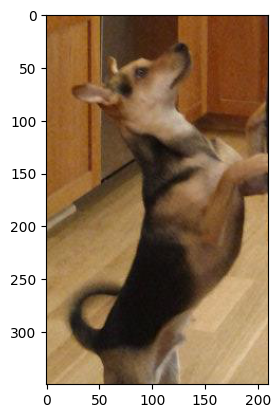

In [ ]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1]
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the
closest endpoint. Display the image using `plt.imshow`.

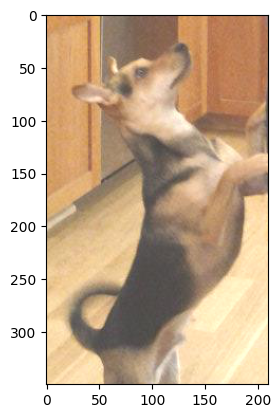

In [ ]:
img_add = img + 0.25
np.clip(img_add, 0, 1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

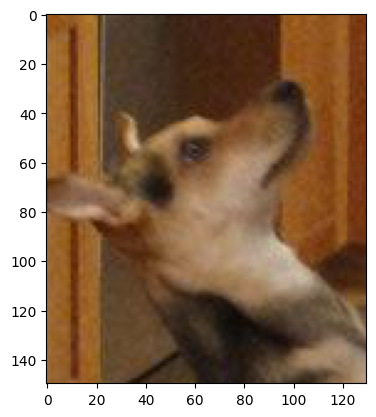

In [ ]:
img_cropped = img[0:150,30:160,0:3]
plt.imshow(img_cropped)

In [ ]:
img_cropped.shape

(150, 130, 3)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [ ]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [ ]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [ ]:
img_torch.shape

torch.Size([150, 130, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [ ]:
img_torch.numel()

58500

There are 58500 floats stored in the tensor in total. $150 \times 130 \times 3 = 58500$

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

`img_torch.transpose(0,2)` will essentially swap/transpose the first and third dimensions in the tensor. (We index the dimensions starting at 0). In this case, img_torch has dimensions of $150 \times 130 \times 3$. When we call this method, we swap the dimensions, resulting in a tensor with dimensions $3 \times 130 \times 150$. The tensor structure associated with `img_torch` does not change after calling this method. it is simply an operation we can perform on the original tensor and doesnt change its structure.



In [ ]:
img_torch.transpose(0,2)

tensor([[[0.6314, 0.6196, 0.6000,  ..., 0.6196, 0.6353, 0.6157],
         [0.6157, 0.6118, 0.6039,  ..., 0.6275, 0.6000, 0.5804],
         [0.6078, 0.5961, 0.5882,  ..., 0.5961, 0.5765, 0.5804],
         ...,
         [0.5137, 0.5020, 0.4784,  ..., 0.7020, 0.6902, 0.6784],
         [0.4863, 0.4863, 0.4784,  ..., 0.7137, 0.7020, 0.6902],
         [0.4902, 0.5020, 0.5098,  ..., 0.7098, 0.7098, 0.6980]],

        [[0.3608, 0.3490, 0.3294,  ..., 0.4118, 0.4275, 0.4157],
         [0.3451, 0.3412, 0.3333,  ..., 0.4196, 0.4000, 0.3804],
         [0.3412, 0.3294, 0.3216,  ..., 0.3961, 0.3765, 0.3804],
         ...,
         [0.2510, 0.2392, 0.2157,  ..., 0.6000, 0.5882, 0.5765],
         [0.2157, 0.2157, 0.2078,  ..., 0.6196, 0.6000, 0.5882],
         [0.2196, 0.2314, 0.2392,  ..., 0.6157, 0.6078, 0.5961]],

        [[0.1059, 0.0941, 0.0745,  ..., 0.2000, 0.2157, 0.2000],
         [0.0902, 0.0863, 0.0784,  ..., 0.2157, 0.1922, 0.1725],
         [0.0863, 0.0745, 0.0667,  ..., 0.1882, 0.1686, 0.

In [ ]:
img_torch

tensor([[[0.6314, 0.3608, 0.1059],
         [0.6157, 0.3451, 0.0902],
         [0.6078, 0.3412, 0.0863],
         ...,
         [0.5137, 0.2510, 0.0863],
         [0.4863, 0.2157, 0.0549],
         [0.4902, 0.2196, 0.0588]],

        [[0.6196, 0.3490, 0.0941],
         [0.6118, 0.3412, 0.0863],
         [0.5961, 0.3294, 0.0745],
         ...,
         [0.5020, 0.2392, 0.0745],
         [0.4863, 0.2157, 0.0549],
         [0.5020, 0.2314, 0.0706]],

        [[0.6000, 0.3294, 0.0745],
         [0.6039, 0.3333, 0.0784],
         [0.5882, 0.3216, 0.0667],
         ...,
         [0.4784, 0.2157, 0.0510],
         [0.4784, 0.2078, 0.0471],
         [0.5098, 0.2392, 0.0784]],

        ...,

        [[0.6196, 0.4118, 0.2000],
         [0.6275, 0.4196, 0.2157],
         [0.5961, 0.3961, 0.1882],
         ...,
         [0.7020, 0.6000, 0.4941],
         [0.7137, 0.6196, 0.5176],
         [0.7098, 0.6157, 0.5216]],

        [[0.6353, 0.4275, 0.2157],
         [0.6000, 0.4000, 0.1922],
         [0.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

`img_torch.unsqueeze(0)` adds and extra dimension with a value of 1 to the tensor at the index of 0. After performing this operation, the tensor will go from $150 \times 130 \times 3$ $⟶$ $1 \times 150 \times 130 \times 3$. The expression will return the tensor with the added dimension. The original variable `img_torch` is not updated after this operation is performed, as seen below.

In [ ]:
img_torch.unsqueeze(0)

tensor([[[[0.6314, 0.3608, 0.1059],
          [0.6157, 0.3451, 0.0902],
          [0.6078, 0.3412, 0.0863],
          ...,
          [0.5137, 0.2510, 0.0863],
          [0.4863, 0.2157, 0.0549],
          [0.4902, 0.2196, 0.0588]],

         [[0.6196, 0.3490, 0.0941],
          [0.6118, 0.3412, 0.0863],
          [0.5961, 0.3294, 0.0745],
          ...,
          [0.5020, 0.2392, 0.0745],
          [0.4863, 0.2157, 0.0549],
          [0.5020, 0.2314, 0.0706]],

         [[0.6000, 0.3294, 0.0745],
          [0.6039, 0.3333, 0.0784],
          [0.5882, 0.3216, 0.0667],
          ...,
          [0.4784, 0.2157, 0.0510],
          [0.4784, 0.2078, 0.0471],
          [0.5098, 0.2392, 0.0784]],

         ...,

         [[0.6196, 0.4118, 0.2000],
          [0.6275, 0.4196, 0.2157],
          [0.5961, 0.3961, 0.1882],
          ...,
          [0.7020, 0.6000, 0.4941],
          [0.7137, 0.6196, 0.5176],
          [0.7098, 0.6157, 0.5216]],

         [[0.6353, 0.4275, 0.2157],
          [0.6000

In [ ]:
img_torch

tensor([[[0.6314, 0.3608, 0.1059],
         [0.6157, 0.3451, 0.0902],
         [0.6078, 0.3412, 0.0863],
         ...,
         [0.5137, 0.2510, 0.0863],
         [0.4863, 0.2157, 0.0549],
         [0.4902, 0.2196, 0.0588]],

        [[0.6196, 0.3490, 0.0941],
         [0.6118, 0.3412, 0.0863],
         [0.5961, 0.3294, 0.0745],
         ...,
         [0.5020, 0.2392, 0.0745],
         [0.4863, 0.2157, 0.0549],
         [0.5020, 0.2314, 0.0706]],

        [[0.6000, 0.3294, 0.0745],
         [0.6039, 0.3333, 0.0784],
         [0.5882, 0.3216, 0.0667],
         ...,
         [0.4784, 0.2157, 0.0510],
         [0.4784, 0.2078, 0.0471],
         [0.5098, 0.2392, 0.0784]],

        ...,

        [[0.6196, 0.4118, 0.2000],
         [0.6275, 0.4196, 0.2157],
         [0.5961, 0.3961, 0.1882],
         ...,
         [0.7020, 0.6000, 0.4941],
         [0.7137, 0.6196, 0.5176],
         [0.7098, 0.6157, 0.5216]],

        [[0.6353, 0.4275, 0.2157],
         [0.6000, 0.4000, 0.1922],
         [0.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [ ]:
max_tensor = torch.tensor([img_torch[:, :, 0].max(), img_torch[:, :, 1].max(), img_torch[:, :, 2].max()])
max_tensor

tensor([0.8941, 0.7882, 0.6745], dtype=torch.float64)

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


In [ ]:
#@title Learning Rate vs. Accuracy table
import pandas as pd

data = {
    '0.005': ['0.964', '0.921'],
    '0.0025': ['0.965', '0.903'],
    '0.01': ['0.961', '0.918'],
    '0.015': ['0.871', '0.852']
}

df = pd.DataFrame(data, index=['Train Accuracy', 'Test Accuracy'])

df


,0.005,0.0025,0.01,0.015
Train Accuracy,0.964,0.965,0.961,0.871
Test Accuracy,0.921,0.903,0.918,0.852


In [ ]:
#@title Num. of Layers vs. Accuracy table
import pandas as pd

data = {
    '2 total layers': ['0.964', '0.921'],
    '3 total layers': ['0.961', '0.913'],
    '4 total layers': ['0.965', '0.923'],
    '5 total layers': ['0.962', '0.919']
}

df = pd.DataFrame(data, index=['Train Accuracy', 'Test Accuracy'])

df

,2 total layers,3 total layers,4 total layers,5 total layers
Train Accuracy,0.964,0.961,0.965,0.962
Test Accuracy,0.921,0.913,0.923,0.919


In [ ]:
#@title Num. of Hidden Units vs. Accuracy table
import pandas as pd

data = {
    '30 hidden units': ['0.964', '0.921'],
    '100 hidden units': ['0.97', '0.923'],
    '200 hidden units': ['0.972', '0.927'],
    '400 hidden units': ['0.978', '0.924']
}

df = pd.DataFrame(data, index=['Train Accuracy', 'Test Accuracy'])

df

,30 hidden units,100 hidden units,200 hidden units,400 hidden units
Train Accuracy,0.964,0.97,0.972,0.978
Test Accuracy,0.921,0.923,0.927,0.924


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

By increasing the number of hidden units to from 30 to **400**, this allows me to achieve a training accuracy of 0.978, which is the highest out of all the modifications and parameters I tested.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 400)
        self.layer2 = nn.Linear(400, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.022
Training Accuracy: 0.978
Test Error Rate: 0.076
Test Accuracy: 0.924


### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

By increasing the number of hidden units to from 30 to **200**, this allows me to achieve a test accuracy of 0.927 -- an increase from the initial 0.921. This parameter modification can be seen in the code below.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 200)
        self.layer2 = nn.Linear(200, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-1-391329e406f1>, line 17)

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

I would choose to use the model hyperparameters from **(b)**, as the higher test accuracy levels show that this model is able to generalize to new data better than the model in (a). The model in (a) may have higher a higher training accuracy value, but the fact that its test accuracy level is lower than the model in (b) might suggest that we may be overfitting the model to our training data in (a), which is another reason why we should select the hyperparameters in (b).

In [ ]:
%%shell
jupyter nbconvert --to html "/content/Lab1_PyTorch_and_ANNs.ipynb"

[NbConvertApp] Converting notebook /content/Lab1_PyTorch_and_ANNs.ipynb to html
[NbConvertApp] Writing 1249980 bytes to /content/Lab1_PyTorch_and_ANNs.html
